## Download iris dataset and usual libraries

In [143]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn
import seaborn as sns

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [144]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [145]:
df = pd.DataFrame(iris_data['data'], columns=['SepalLength','SepalWidth','PetalLength','PetalWidth'])

In [166]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(df)
clusters = gmm.predict(df)

In [167]:
y_pred = clusters

In [168]:
y = iris_data['target']

In [169]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [170]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [172]:
from collections import Counter
c = Counter(y_pred)
c.most_common()

[(2, 55), (0, 50), (1, 45)]

In [173]:
np.sum(y_pred==y) / len(y_pred) 

0.9666666666666667

In [174]:
from sklearn.datasets import make_blobs

In [175]:
X, y = make_blobs(n_samples = 2000, cluster_std=np.array([0.4, 0.3, 0.1, 0.1, 0.1]), random_state=2, centers=np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]),)

In [176]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [177]:
X.shape

(2000, 2)

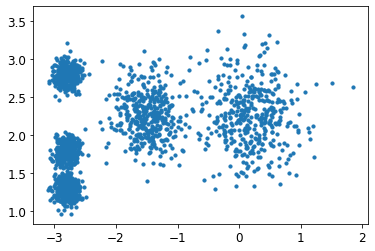

In [178]:
plt.scatter(X[:, 0], X[:, 1], s=10);

In [179]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

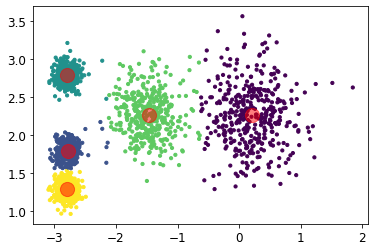

In [180]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [181]:
centers

array([[ 0.20527099,  2.26255783],
       [-2.78298281,  1.80067996],
       [-2.78874822,  2.79362203],
       [-1.46924256,  2.27312876],
       [-2.79972331,  1.29106305]])

In [182]:
# new instances where we do not know the answer
Xnew = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5],[3,4]])
# make a prediction
kmeans.fit(Xnew)
ynew = kmeans.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[0. 2.], Predicted=0
X=[3. 2.], Predicted=3
X=[-3.  3.], Predicted=4
X=[-3.   2.5], Predicted=1
X=[3. 4.], Predicted=2


In [183]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [184]:
vor = Voronoi(centers)

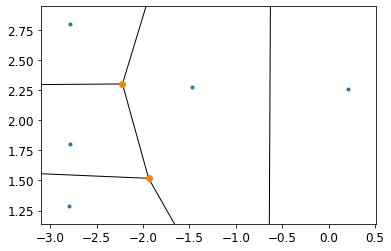

In [185]:
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()

In [186]:
wcss = []
for i in range(3, 9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)

651.3997089544974
269.9339858587969
217.62251288601306
175.1416141327276
147.27365731226328
125.12037117430279


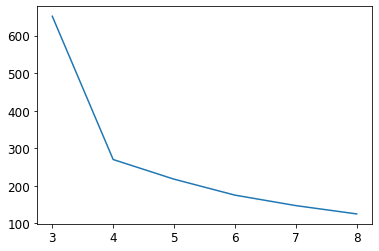

In [187]:
plt.plot(range(3, 9), wcss)
plt.show()